# Set Up

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%matplotlib inline

train = pd.read_csv('./data/train.csv')
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Examining the Data

In [2]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
# Collecting the 'object' columns
obj_cols = list(train.columns[train.dtypes=='object'])
obj_cols.remove('Loan_ID')
obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [4]:
# Showing unique values of each column with 'object' data types
# This will help determine how to preprocess them into number data types
for col in obj_cols:
    print(f"{col}:")
    print(f"{train[col].unique()}\n")

Gender:
['Male' 'Female' nan]

Married:
['No' 'Yes' nan]

Dependents:
['0' '1' '2' '3+' nan]

Education:
['Graduate' 'Not Graduate']

Self_Employed:
['No' 'Yes' nan]

Property_Area:
['Urban' 'Rural' 'Semiurban']

Loan_Status:
['Y' 'N']



# Preprocessing Data

In [62]:
ntrain = train.copy()

## Finding missing values

In [63]:
rows = train.shape[0]

for col in ntrain.columns:
    missing = ntrain[col].isnull().sum()
    if missing > 0:
        print(f"{col}: {(missing/rows)*100:.2f}%")
        print(f"{missing} missing values out of {rows}\n")

Gender: 2.12%
13 missing values out of 614

Married: 0.49%
3 missing values out of 614

Dependents: 2.44%
15 missing values out of 614

Self_Employed: 5.21%
32 missing values out of 614

LoanAmount: 3.58%
22 missing values out of 614

Loan_Amount_Term: 2.28%
14 missing values out of 614

Credit_History: 8.14%
50 missing values out of 614



Luckily, none of the columns above have significantly large amounts of missing data, so I will simply determine the missing values myself based on similar patterns. The first step that comes to mind is starting with the personal information data of the applicants, like gender, marriage status, number of dependents, employment type, and credit history.

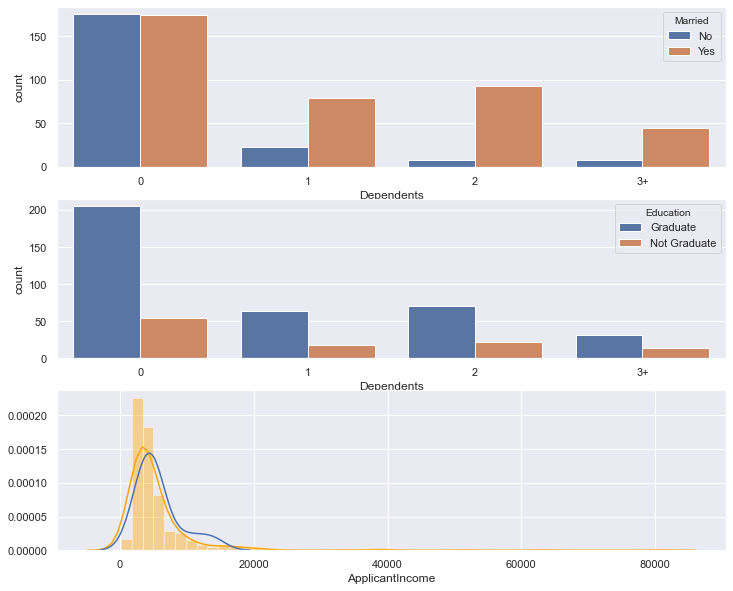

In [168]:
sns.set(rc={'figure.figsize': (12,10)})

subplot(3,1,1)
f1 = sns.countplot(data=ntrain, x='Dependents', hue='Married')

subplot(3,1,2)
f2 = sns.countplot(data=ntrain[ntrain.Gender=='Male'], x='Dependents', hue='Education')

subplot(3,1,3)
ax = sns.distplot(ntrain.ApplicantIncome, color='orange')
f3 = sns.distplot(ntrain[ntrain.Dependents.isnull()].ApplicantIncome, ax=ax, hist=False)

plt.show()

Some immediate findings can be that (1) If an applicant is not married, it is most likely that they do not have any dependents, (2) Even if an applicant it the chances of having dependent(s) is comparably small, though this would need to be looked into further.

But first, I will replace all null values of 'Dependents' of unmarried applicants to 0.

In [89]:
ntrain.loc[(ntrain.Married=='No') & (ntrain.Dependents.isnull()), 'Dependents'] = '0'
ntrain[(ntrain.Married=='No') & (ntrain.Dependents.isnull())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [112]:
# all rows with missing Dependents values
ntrain[ntrain.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


In [15]:
# Creating a copy of the original dataset
ntrain = train.copy()

# Binary Encoding the following columns:
# (Generally 0 means 'no' or implies negation, while 1 the opposite)

# Gender
ntrain.loc[ntrain.Gender == 'Male', 'Gender_encoded'] = 0
ntrain.loc[ntrain.Gender == 'Female', 'Gender_encoded'] = 1
print(ntrain.shape)

# Married
ntrain.loc[ntrain.Married == 'No', 'is_married'] = 0
ntrain.loc[ntrain.Married == 'Yes', 'is_married'] = 1
print(ntrain.shape)

# Married
ntrain.loc[ntrain.Education == 'No', 'is_graduate'] = 0
ntrain.loc[ntrain.Education == 'Yes', 'is_graduate'] = 1
print(ntrain.shape)

# Self_Employed
ntrain.loc[ntrain.Self_Employed == 'No', 'is_self_employed'] = 0
ntrain.loc[ntrain.Self_Employed == 'Yes', 'is_self_employed'] = 1
print(ntrain.shape)

# Loan_Status
ntrain.loc[ntrain.Loan_Status == 'N', 'loan_approved'] = 0
ntrain.loc[ntrain.Loan_Status == 'Y', 'loan_approved'] = 1
print(ntrain.shape)

ntrain.head()

(614, 14)
(614, 15)
(614, 16)
(614, 17)
(614, 18)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_encoded,is_married,is_graduate,is_self_employed,loan_approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0,0.0,NaN,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,NaN,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,1.0,NaN,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0,1.0,NaN,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,0.0,NaN,0.0,1.0


In [13]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()

# Creat a new column called 'has_child'
ntrain.loc[ntrain.Dependents=='0', 'has_child'] = 0
ntrain.loc[ntrain.has_child.isnull(), 'has_child'] = 1

# Dependents
ntrain.Dependents = ntrain.Dependents.astype(str)
results = binarizer.fit_transform(ntrain["Dependents"])
dependents_encoded = pd.DataFrame(results, columns=['0','1','2','3','nan'])

# Property_Area
results = binarizer.fit_transform(ntrain["Property_Area"])
property_area_encoded = pd.DataFrame(results, columns=binarizer.classes_)

ntrain = pd.concat([ntrain, education_encoded, property_area_encoded, dependents_encoded], axis=1, sort=False)
ntrain.drop('Property_Area', axis=1, inplace=True)
ntrain.drop('Dependents', axis=1, inplace=True)

ntrain.head()

ValueError: Shape of passed values is (614, 1), indices imply (614, 2)

# Finding correlation between columns

In [17]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Figure size 1440x1296 with 0 Axes>

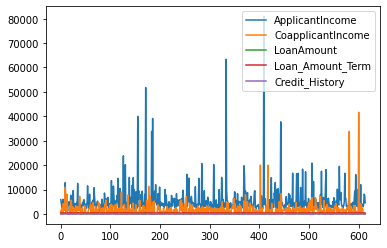

In [22]:
sns.

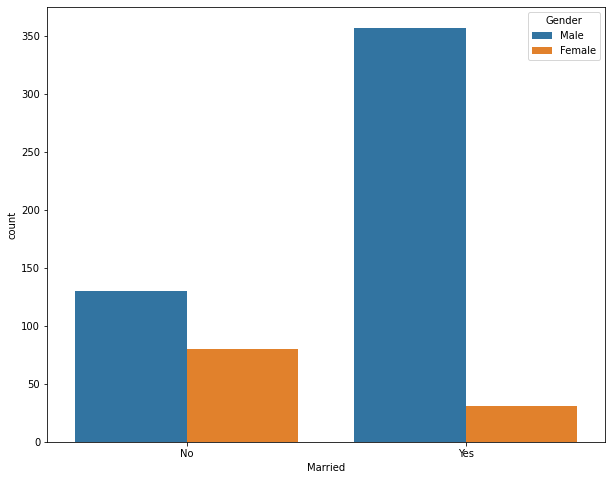

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='Married', hue='Gender')

In [42]:
train[train.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


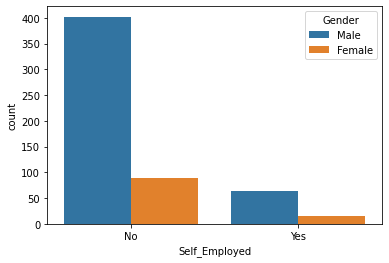

In [43]:
sns.countplot(data=train, x='Self_Employed', hue='Gender')

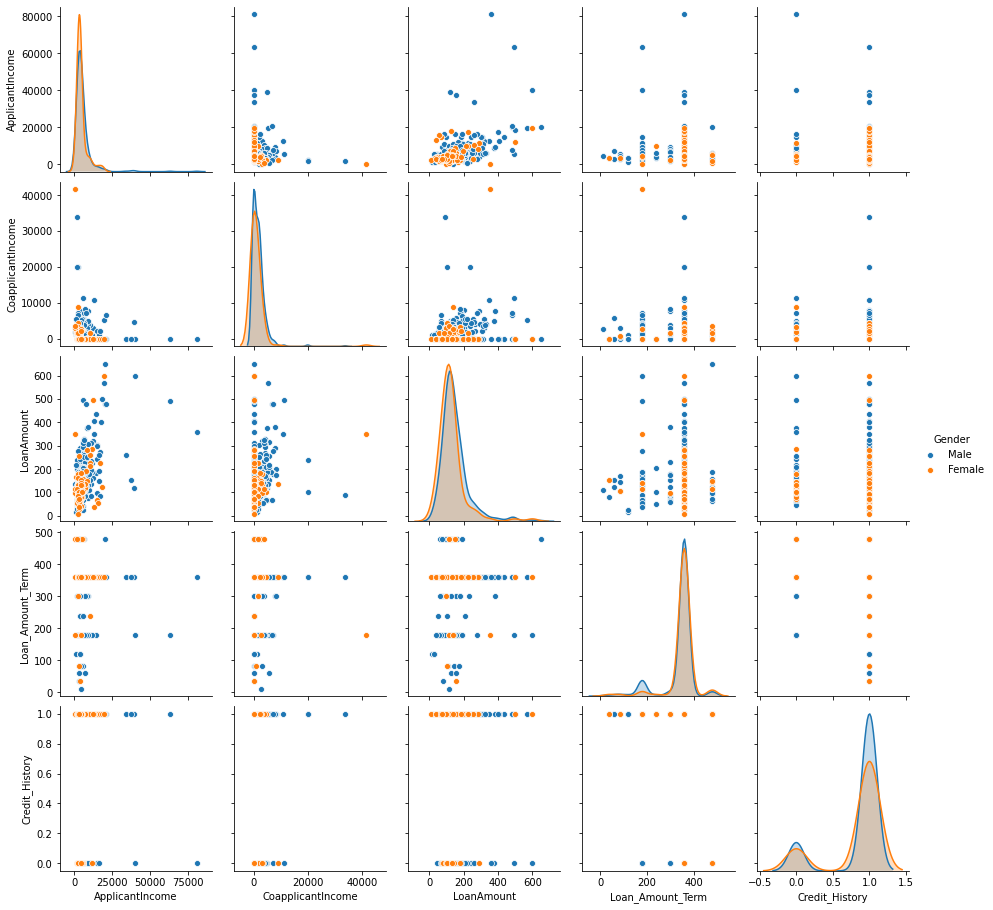

In [50]:
sns.pairplot(train, hue='Gender', height=2.5)

# Preprocessing Data (2)